# Deep Hedging AI: Comparison to Black & Scholes

In this notebook we run Deep Hedging in a Black & Scholes world. In this case we can compare hedging a vanilla call vs its perfect hedge.

### Proof that Deep Hedging should converge to the Black & Scholes price

We are using the notation from the mark down file https://github.com/hansbuehler/deephedging.
Let $Z_T$ be the claim in $T$. Assume that there are no trading cost and that the market is _complete_. This applies to Black & Scholes, and also to most other models typically used in quant finance.
In the limit of $dt\downarrow 0$ that menas there is a perfect replication strateg $\alpha^*$ such that
$$
    (*) \ \ \ \ Z_T \equiv z_0 + \sum_{t=0}^{T-1} \alpha_t^*(s_t)\ ( H_T - H_t)
$$
The constant $z_0$ is the risk-neutral price of $Z_T$.

Consider now our risk-adjusted return metric $U$ as used in Deep Hedging. We are trying to compute
$$
    \sup_a:\ U\left[\ Z_T + \sum_{t=0}^{T-1} a_t(s_t)\ ( H_T - H_t)\ \right]
$$
We now insert $(*)$ for $Z_T$. That gives
$$
    \sup_a:\ U\left[\ z_0 + \sum_{t=0}^{T-1} \alpha_t^*(s_t)\ ( H_T - H_t) + \sum_{t=0}^{T-1} a_t(s_t)\ ( H_T - H_t)\ \right]
$$
Because of _cash-invariance_ we can move $z_0$ out of $U$.
$$
(**) \ \ \ \    z_0 + \sup_a:\ U\left[\ \sum_{t=0}^{T-1} \left( \alpha_t^*(s_t) - a_t(s_t) \right)\ ( H_T - H_t) \ \right]
$$
In case that the underlying path generator is a risk-neutral measure we get $\mathrm{E}_t[ H_T - H_t ] = 0$ and therefore that $\mathrm{E}_t[ x_t(a_t) ( H_T - H_t)  ]=0$ for any possible strategy $x$.
Moreover, because $U$ has the property that $U(X) \leq E[X]$ we see that an optimal solutio for $(**)$ is achived in
$$
    a_t = -\alpha^*_t
$$
which means that the optimal solution to the Deep Hedging problem for _any_ monetary utility is the risk-neutral strategy.
We also note that the utility of $Z_T$ under the Deep Hedging is
$
z_0 + U(0) = z_0 
$
in other words it returns the risk-neutral price as well.

In [16]:
!pip -q install cdxbasics "tensorflow==2.10" "tensorflow_probability==0.14"
""" Slighly annoying: by default the SageMaker Python import directory does not include our git directory """
import os
p = os.getcwd()
dhn = "/deephedging/"
i = p.find(dhn)
if i!=-1:
    p = p[:i]
    import sys
    sys.path.append(p)
    print("SageMaker: added python path %s" % p)

SageMaker: added python path /home/ec2-user/SageMaker


Deep Hedging AI says hello  ... 

2023-01-16 19:59:33.107311: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-16 19:59:33.271410: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Tensorflow version 2.10.0 running on 1 CPUs and 0 GPUs


2023-01-16 19:59:35.249320: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-01-16 19:59:35.249369: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ip-172-16-12-144.eu-west-2.compute.internal): /proc/driver/nvidia/version does not exist


## Deep Hedging in a Black \& Scholes World

2023-01-16 19:59:36.172031: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Gym with 943 trainable weights compiled and initialized. Took 5s
Network feature information:
 Features used by the agent:        delta, price and time_left
 Features available to the agent:   action, cost, delta, lbnd_a, pnl, price, spot, sqrt_time_left, time_left and ubnd_a
 Features used by the utility:      -
 Features available to the utility: cost, lbnd_a, price, spot, sqrt_time_left, time_left and ubnd_a
Caching enabled @ '/home/ec2-user/SageMaker/deephedging/notebooks/.deephedging_cache/d353094d422761e290dfa3fa8c6bafab.pck'
Cache successfully loaded. Current epoch: 558
Training monitor initialized. Took 0s



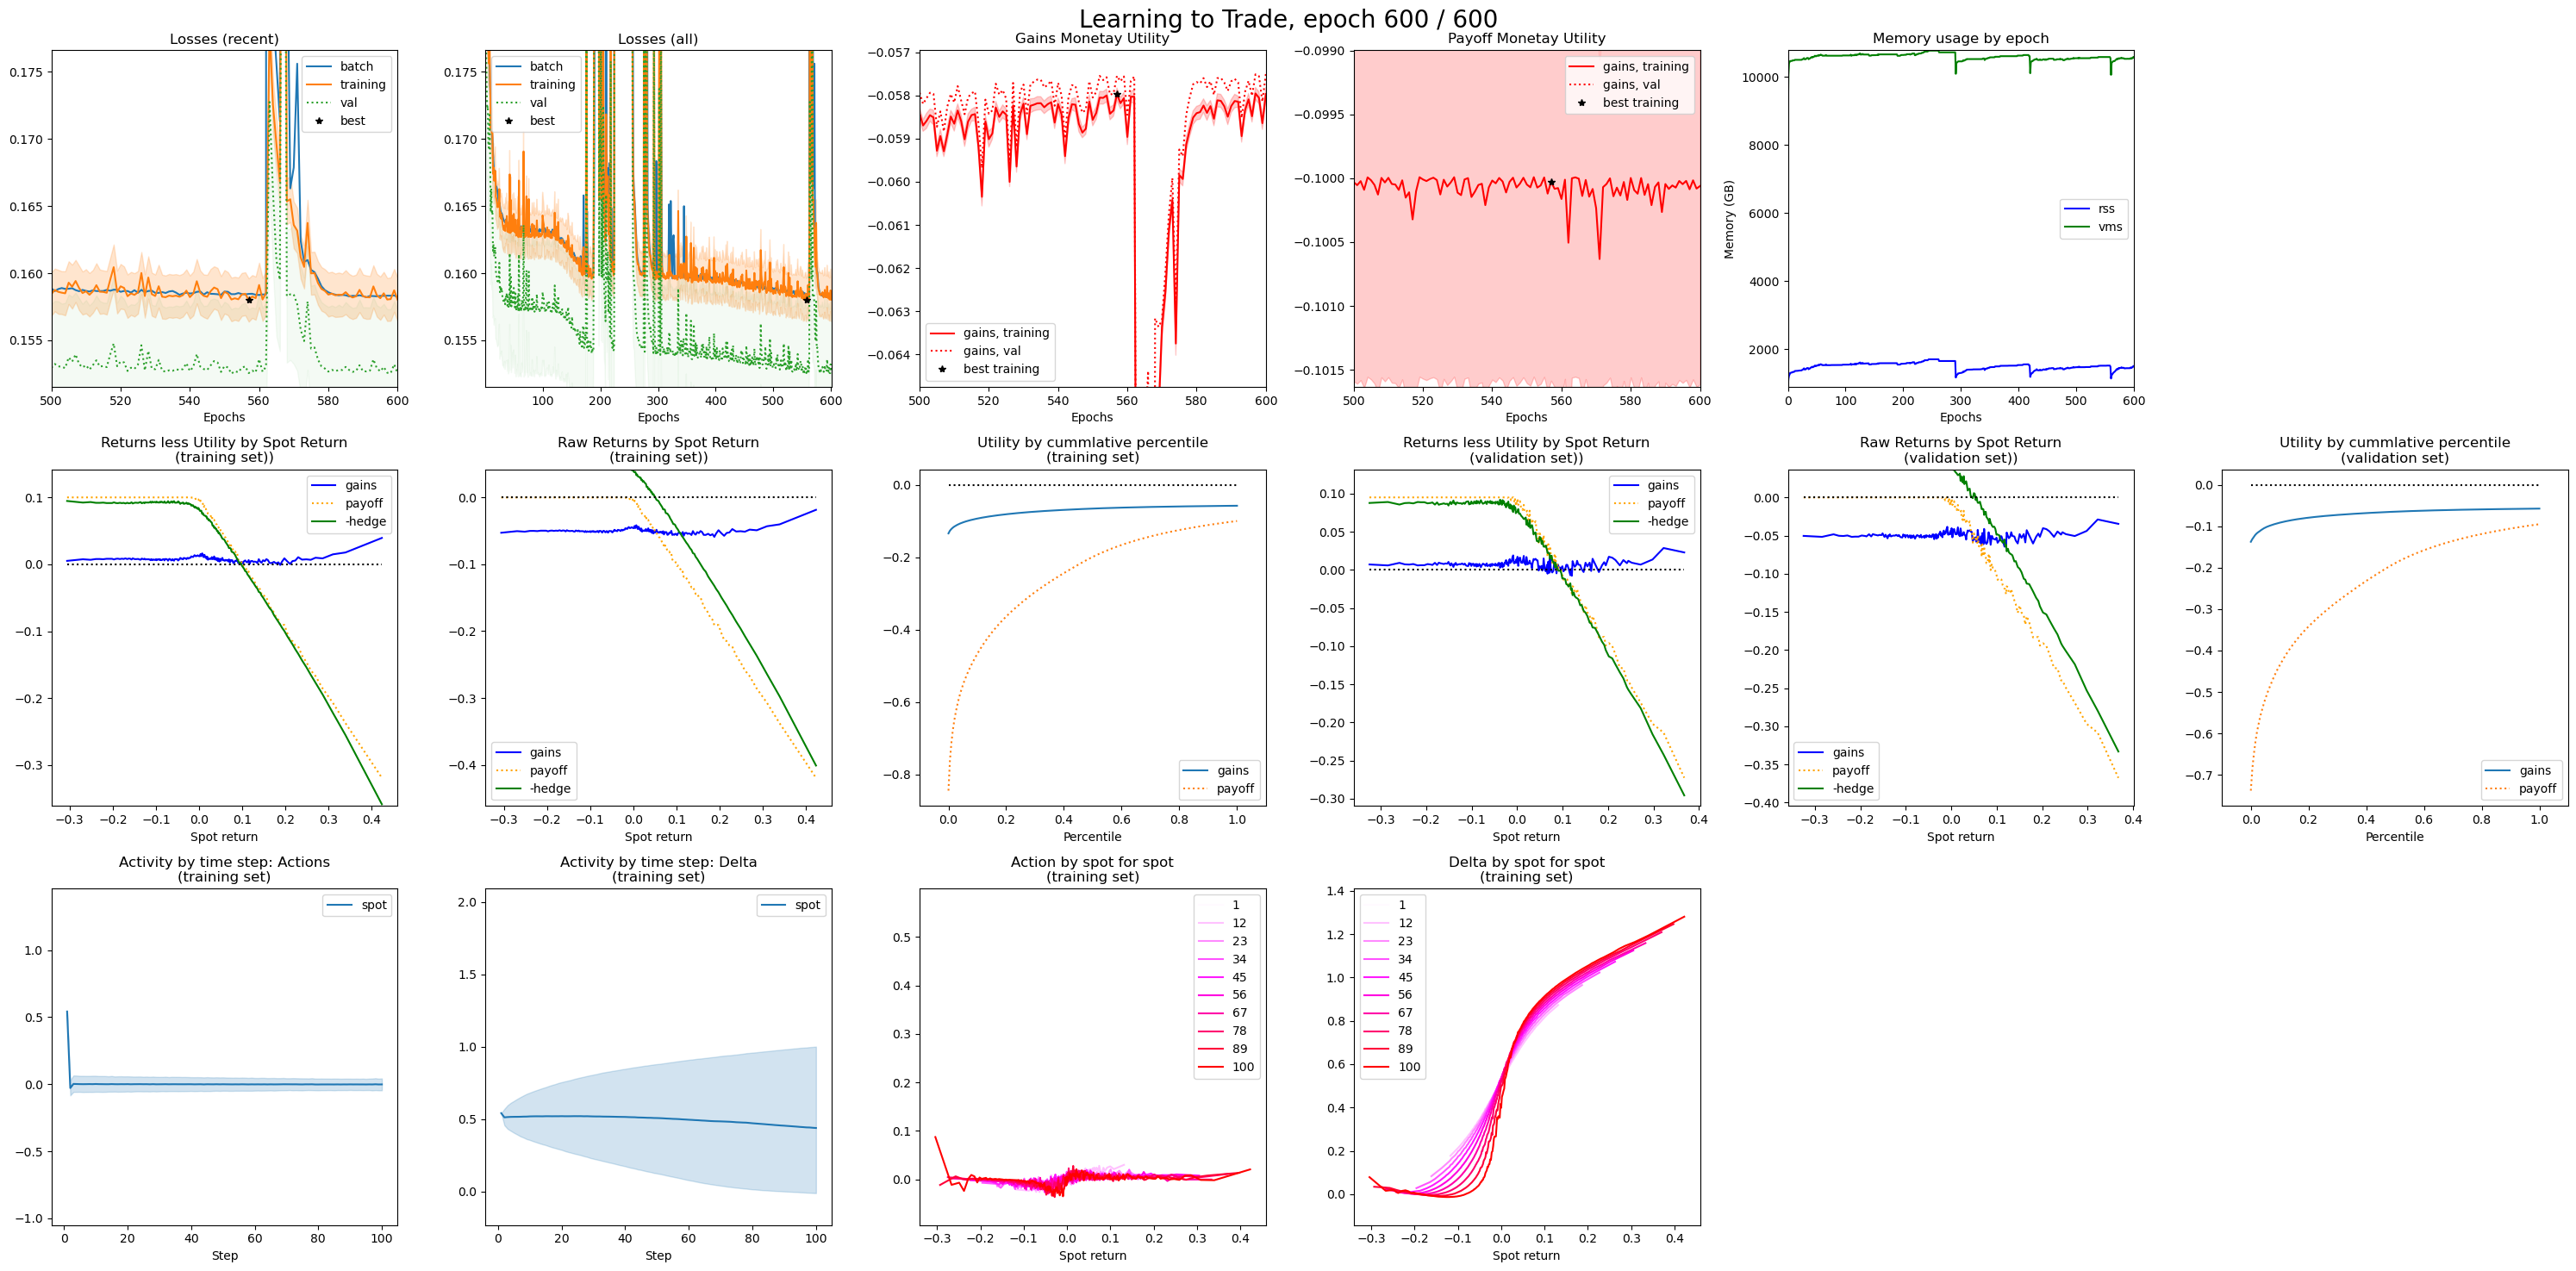

Training 600/600 epochs; 943 weights; 10000 samples; 1000 validation samples batch size 32 | initial loss 3.43218 (0.0545499), training 0.158029 (0.00162139), best 0.158 (0.0545499), batch 0.158227, val 0.152544 (0.00478731). Best epoch 556; last cached 599. | memory used: rss 1496.48M, vms 10570.7M | time elapsed 12:21:06; time per epoch 1:14; estimated time remaining 12:21:06                        
 Status: Training complete.
 Weights set to best epoch: 556
 State of training until epoch 599 cached into /home/ec2-user/SageMaker/deephedging/notebooks/.deephedging_cache/d353094d422761e290dfa3fa8c6bafab.pck

Training terminated. Total time taken 57:39
Keys of the dictionary returned by the gym:  odict_keys(['loss', 'utility', 'utility0', 'gains', 'payoff', 'pnl', 'cost', 'actions'])
Config usage report
config.gym.agent.network['activation'] = softplus # Network activation function; default: relu
config.gym.agent.network['depth'] = 3 # Network depth; default: 3
config.gym.agent.network[

In [2]:
print("Deep Hedging AI says hello  ... ", end='')
from cdxbasics.config import Config
from deephedging.trainer import train
from deephedging.gym import VanillaDeepHedgingGym
from deephedging.world_bs import SimpleWorld_BS

from IPython.display import display, Markdown

# see print of the config below for numerous options
config = Config()
# world
config.world.samples = 10000
config.world.steps = 20*5  # increase step size by 5 to match original marurity
config.world.dt = 1./250.  # decrease 'dt'
config.world.drift = 0.
config.world.cost = 0.
# gym
config.gym.objective.utility = "cvar"
config.gym.objective.lmbda = 1.
config.gym.agent.network.depth = 3
config.gym.agent.network.activation = "softplus"
# trainer
from tensorflow.keras import optimizers
opt = optimizers.Adam( clipvalue=0.5, global_clipnorm = 10.)

config.trainer.train.optimizer = opt
config.trainer.train.batch_size = None
config.trainer.train.epochs = 600
config.trainer.caching.mode = "on"
config.trainer.visual.epoch_refresh = 1
config.trainer.visual.time_refresh = 10
config.trainer.visual.confidence_pcnt_lo = 0.25
config.trainer.visual.confidence_pcnt_hi = 0.75

display(Markdown("## Deep Hedging in a Black \& Scholes World"))

# create world
world  = SimpleWorld_BS( config.world )
val_world  = world.clone(samples=1000)

# create training environment
gym = VanillaDeepHedgingGym( config.gym )

# create training environment
train( gym=gym, world=world, val_world=val_world, config=config.trainer )
r = gym(world.tf_data)
print("Keys of the dictionary returned by the gym: ", r.keys())

print("=========================================")
print("Config usage report")
print("=========================================")
print( config.usage_report() )
config.done()

### Comparison to Black & Scholes
#### See also notebooks/blackscholes

Note that we use medium risk aversion, hence the hedge is not expected to match the risk-neutral hedge. See the sub directory <tt>blackscholes</tt> for experiments approximating the black & scholes solution

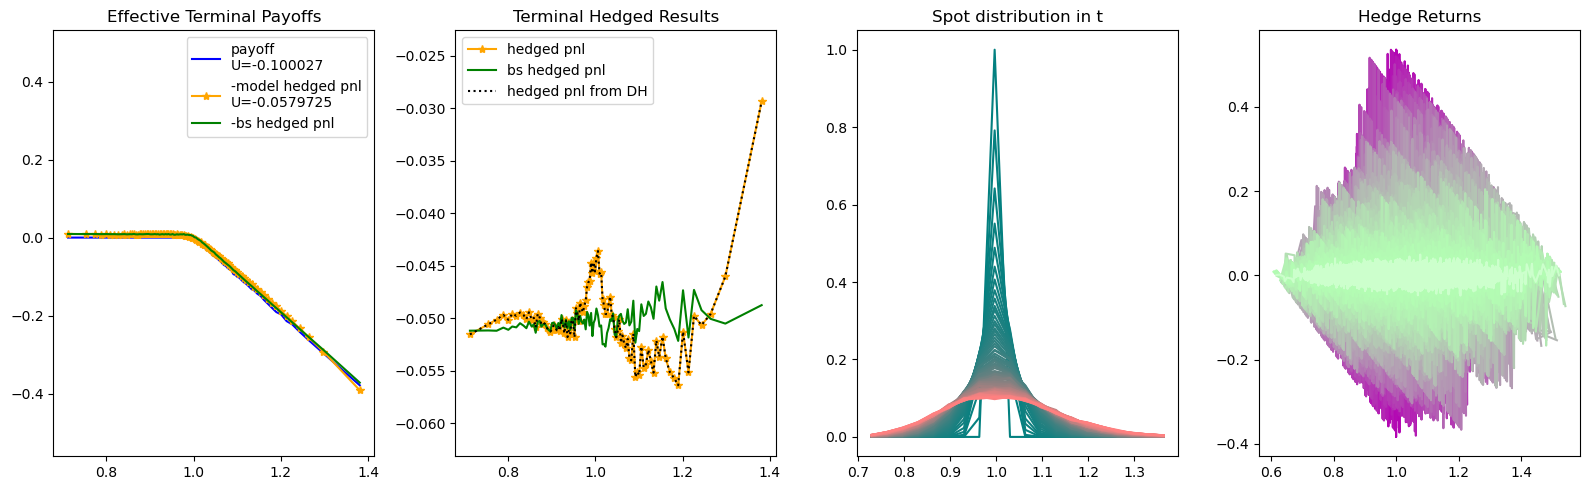

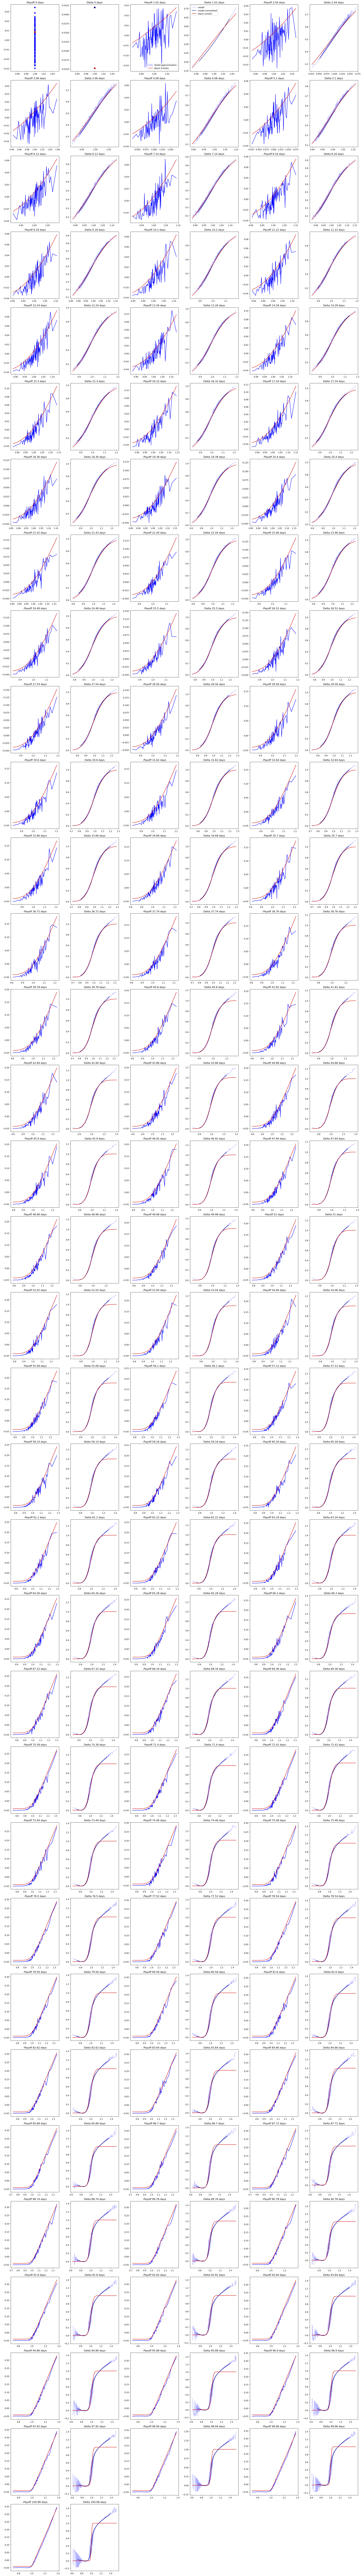

In [15]:
import deephedging.plot_bs_hedge as plot_bs_hedge
import imp
imp.reload(plot_bs_hedge)

plot_bs_hedge.plot_blackscholes( world, gym, config )